In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [202]:
krs = pd.read_csv("C:\\personal\\projects\\wave2web\\KRS.csv")

In [21]:
krs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SL_NO                3313 non-null   int64  
 1   RESERVOIR            3313 non-null   object 
 2   YEAR                 3313 non-null   int64  
 3   WEEK_NO              3313 non-null   int64  
 4   FLOW_DATE            3313 non-null   object 
 5   PRESENT_STORAGE_TMC  3313 non-null   float64
 6   RES_LEVEL_FT         3313 non-null   object 
 7   INFLOW_CUSECS        3313 non-null   object 
 8   OUTFLOW_CUECS        3313 non-null   int64  
 9   UNIQUE_KEY           3313 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 259.0+ KB


In [22]:
krs.describe()

,SL_NO,YEAR,WEEK_NO,PRESENT_STORAGE_TMC,OUTFLOW_CUECS
count,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000
mean,22243.906731,2015.733172,27.738605,28.056453,4841.711138
std,12762.354003,2.827366,14.926730,14.358629,9499.776372
min,51.000000,2010.000000,1.000000,0.000000,0.000000
25%,11135.000000,2014.000000,15.000000,14.310000,715.000000
50%,22489.000000,2016.000000,29.000000,27.380000,3703.000000
75%,33274.000000,2018.000000,41.000000,42.100000,5161.000000
max,43919.000000,2020.000000,52.000000,49.450000,151365.000000


In [203]:
popu = pd.read_csv("C:\\personal\\projects\\wave2web\\Bangalore-population-2021-07-17.csv")

In [131]:
krs.head(5)

,SL_NO,RESERVOIR,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
0,51,K.R.S,2011,1,2011-01-01,46.42,122.59,2029,2000,K.R.S-2011-01-01
1,52,K.R.S,2011,1,2011-01-02,46.54,122.68,3084,1490,K.R.S-2011-01-02
2,53,K.R.S,2011,1,2011-01-03,46.64,122.75,2776,1491,K.R.S-2011-01-03
3,54,K.R.S,2011,1,2011-01-04,46.69,122.79,2311,1491,K.R.S-2011-01-04
4,55,K.R.S,2011,1,2011-01-05,46.70,122.80,1847,1491,K.R.S-2011-01-05


In [132]:
popu.head(5)

,date,Population,Annual Change
0,31-12-1950,746000,NaN
1,31-12-1951,790000,5.90
2,31-12-1952,825000,4.43
3,31-12-1953,862000,4.48
4,31-12-1954,900000,4.41


In [133]:
krs.set_index(pd.to_datetime(krs['FLOW_DATE']),inplace = True)
popu.set_index(pd.to_datetime(popu['date']),inplace = True)

In [168]:
krs = krs.loc['2011':]

In [169]:
krs

,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS
FLOW_DATE,,,,
2011-01-01,46.42,122.59,2029,2000
2011-01-02,46.54,122.68,3084,1490
2011-01-03,46.64,122.75,2776,1491
2011-01-04,46.69,122.79,2311,1491
2011-01-05,46.70,122.80,1847,1491
...,...,...,...,...
2020-12-12,43.04,120,3496,3308
2020-12-13,43.02,119.98,3197,3300
2020-12-14,42.98,119.95,3026,3273


In [170]:
krs = krs[['PRESENT_STORAGE_TMC','RES_LEVEL_FT'	,'INFLOW_CUSECS','OUTFLOW_CUECS']]

In [171]:
krs_yearly = krs.resample('Y').sum()

In [172]:
krs_yearly['year'] = krs_yearly.index.year
popu['year'] = popu.index.year

In [173]:
popu['year'] = popu.index.year

In [174]:
print(krs_yearly.head(5))
print(popu.head(5))

            PRESENT_STORAGE_TMC  OUTFLOW_CUECS  year
FLOW_DATE                                           
2010-12-31                91.99          13635  2010
2011-12-31             13403.17        2151348  2011
2012-12-31              4249.94         851843  2012
2013-12-31              8266.85        1553290  2013
2014-12-31             11639.04        1525766  2014
                  date   Population   Annual Change  year
date                                                     
1950-12-31  31-12-1950       746000             NaN  1950
1951-12-31  31-12-1951       790000            5.90  1951
1952-12-31  31-12-1952       825000            4.43  1952
1953-12-31  31-12-1953       862000            4.48  1953
1954-12-31  31-12-1954       900000            4.41  1954


In [107]:
joint = krs_yearly.merge(popu)


In [193]:
res = joint[['year',' Population',' Annual Change','OUTFLOW_CUECS']]

In [186]:
res = res.iloc[1:]

In [195]:
res

,year,Population,Annual Change,OUTFLOW_CUECS
0,2010,8296000,4.10,13635
1,2011,8636000,4.10,2151348
2,2012,8990000,4.10,851843
3,2013,9358000,4.09,1553290
4,2014,9742000,4.10,1525766
5,2015,10141000,4.10,1906556
6,2016,10557000,4.10,1073246
7,2017,10990000,4.10,861124
8,2018,11440000,4.09,2678541
9,2019,11883000,3.87,2062007


In [196]:
res[' Population'].corr(res['OUTFLOW_CUECS'])

0.39836098412061854

In [197]:
res[' Annual Change'].corr(res['OUTFLOW_CUECS'].pct_change())

0.17274485640256243

In [190]:
res_diff = res.diff()
res_diff = res_diff.dropna()

In [191]:
res_diff

,year,Population,Annual Change,OUTFLOW_CUECS
2,1.0,354000.0,0.00,-1299505.0
3,1.0,368000.0,-0.01,701447.0
4,1.0,384000.0,0.01,-27524.0
5,1.0,399000.0,0.00,380790.0
6,1.0,416000.0,0.00,-833310.0
7,1.0,433000.0,0.00,-212122.0
8,1.0,450000.0,-0.01,1817417.0
9,1.0,443000.0,-0.22,-616534.0
10,1.0,444000.0,-0.13,-698774.0


In [198]:
res_diff[' Population'].corr(res_diff['OUTFLOW_CUECS'])

0.21786026551780138

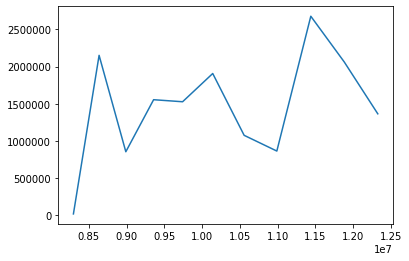

In [205]:
plt.sc(res[' Population'], res['OUTFLOW_CUECS'])